# Polynomial Regression



Polynomial regression is an extension of linear regression that allows modeling nonlinear relationships between variables by fitting a polynomial equation to the data.

Unlike simple linear regression (y = β₀ + β₁x), polynomial regression introduces higher-order terms:

y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ + ε

Where:
- y is the dependent variable
- x is the independent variable
- β values are the coefficients
- ε represents the error term
- n is the degree of the polynomial


# Key aspects of polynomial regression:




1. **Flexibility**: Can capture curved relationships that linear regression would miss
2. **Model selection**: Choosing the right polynomial degree is crucial
   - Too low: underfitting (high bias)
   - Too high: overfitting (high variance)

3. **Implementation**: Often uses the same estimation methods as linear regression (like ordinary least squares)

4. **Interpretation**: Higher-degree models become harder to interpret conceptually



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing
boston_df = fetch_california_housing()


In [4]:
boston_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
X = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = pd.DataFrame(boston_df.target, columns=boston_df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
X_s = X[['AveRooms']].values
y_s = y.values

In [9]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Function to create and evaluate polynomial regression model
def evaluate_poly_regression(degree, X_train, X_test, y_train, y_test, use_ridge=False, alpha=1.0):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Choose model (Linear Regression or Ridge)
    if use_ridge:
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    # Train model
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    return {
        'model': model,
        'poly': poly,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'r2': r2,
        'coefficients': model.coef_
    }


In [12]:
# Evaluate models with different polynomial degrees
degrees = range(1, 4)
results = []


In [13]:
for degree in degrees:
    result = evaluate_poly_regression(degree, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append(result)
    if result['r2'] <0.4:
      break
    print(f"Degree {degree}:")
    print(f"  Training RMSE: {result['train_rmse']:.2f}")
    print(f"  Testing RMSE: {result['test_rmse']:.2f}")
    print(f"  R²: {result['r2']:.4f}")

Degree 1:
  Training RMSE: 0.72
  Testing RMSE: 0.73
  R²: 0.5958
Degree 2:
  Training RMSE: 0.65
  Testing RMSE: 0.67
  R²: 0.6534


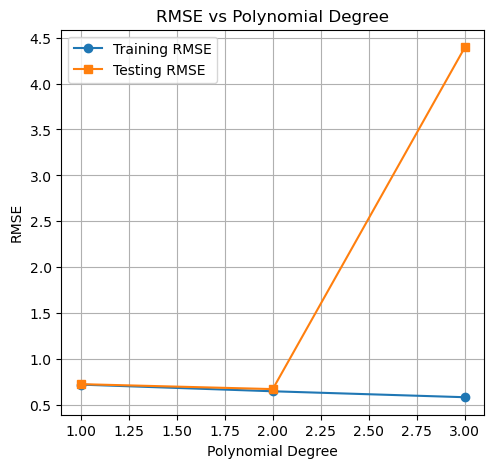

In [14]:
# Plot RMSE vs polynomial degree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_rmse_values = [result['train_rmse'] for result in results]
test_rmse_values = [result['test_rmse'] for result in results]
plt.plot(degrees, train_rmse_values, 'o-', label='Training RMSE')
plt.plot(degrees, test_rmse_values, 's-', label='Testing RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.legend()
plt.grid(True)

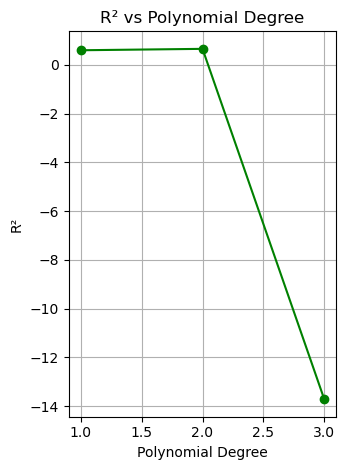

In [15]:
# Plot R² vs polynomial degree
plt.subplot(1, 2, 2)
r2_values = [result['r2'] for result in results]
plt.plot(degrees, r2_values, 'o-', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.title('R² vs Polynomial Degree')
plt.grid(True)
plt.tight_layout()

In [16]:
# Find optimal degree based on test RMSE
optimal_degree_idx = np.argmin(test_rmse_values)
optimal_degree = degrees[optimal_degree_idx]
print(f"\nOptimal polynomial degree based on test RMSE: {optimal_degree}")


Optimal polynomial degree based on test RMSE: 2


In [17]:
# Cross-validation for degree selection
def evaluate_with_cv(degree, X, y, cv=5):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    cv_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    return rmse_scores.mean()

In [18]:
# Perform cross-validation
print("\nCross-validation results:")
cv_rmse_values = []
for degree in degrees:
    cv_rmse = evaluate_with_cv(degree, X_train_scaled, y_train)
    cv_rmse_values.append(cv_rmse)
    if cv_rmse >100:
      break
    print(f"Degree {degree}: CV RMSE = {cv_rmse:.2f}")



Cross-validation results:
Degree 1: CV RMSE = 0.73
Degree 2: CV RMSE = 4.72


In [19]:
# Find optimal degree based on cross-validation
cv_optimal_degree_idx = np.argmin(cv_rmse_values)
cv_optimal_degree = degrees[cv_optimal_degree_idx]
print(f"\nOptimal polynomial degree based on cross-validation: {cv_optimal_degree}")


Optimal polynomial degree based on cross-validation: 1


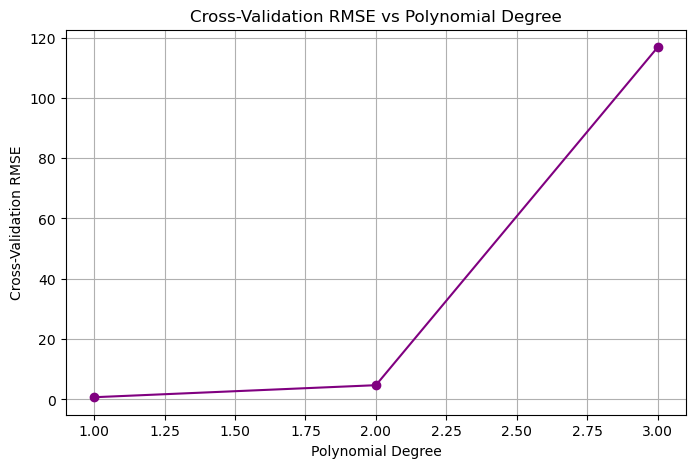

In [20]:
# Plot cross-validation RMSE
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_rmse_values, 'o-', color='purple')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation RMSE')
plt.title('Cross-Validation RMSE vs Polynomial Degree')
plt.grid(True)


In [24]:
degrees

range(1, 4)

In [30]:
X_train_scaled.shape, y_train.shape

((14448, 8), (14448, 1))

ValueError: x and y must be the same size

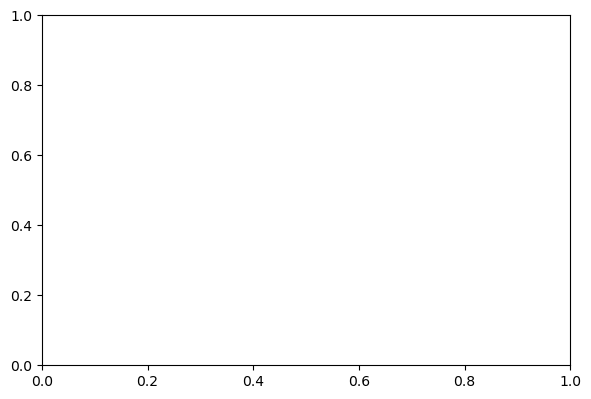

In [33]:
# Compare models visually
plt.figure(figsize=(15, 10))

# Generate points for plotting smooth curves
#X_plot = np.linspace(min(X_train_scaled.flatten()), max(X_train_scaled.flatten()), 100).reshape(-1, 1)

# Plot for various degrees
#degrees_to_plot = [1, 2, optimal_degree, 8]
degrees_to_plot = [1,2,3,4]
for i, degree in enumerate(degrees_to_plot):
    plt.subplot(2, 2, i+1) 

    # Get the model and polynomial transformer
    model = results[degree-1]['model']
    poly = results[degree-1]['poly']

    # Transform points for smooth curve
    X_plot_poly = poly.transform(X_train_scaled)
    y_plot = model.predict(X_plot_poly)

    # Plot data points
    plt.scatter(X_train_scaled[0, :], y_train, alpha=0.6, color='blue', label='Training data')
    plt.scatter(X_test_scaled, y_test, alpha=0.6, color='red', label='Testing data')

    # Plot model prediction
    plt.plot(X_plot, y_plot, color='green', linewidth=2, label=f'Degree {degree} model')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Standardized Average Number of Rooms')
    plt.ylabel('House Price ($1000s)')
    plt.legend()
    plt.grid(True)

In [ ]:
# Evaluate Ridge Regression to address overfitting
print("\nRidge Regression results for degree 4:")
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []

for alpha in alphas:
    result = evaluate_poly_regression(8, X_train_scaled, X_test_scaled, y_train, y_test,
                                     use_ridge=True, alpha=alpha)
    ridge_results.append(result)
    print(f"Alpha = {alpha}:")
    print(f"  Test RMSE: {result['test_rmse']:.2f}")
    print(f"  R²: {result['r2']:.4f}")

# Plot Ridge coefficient magnitudes for different alpha values
plt.figure(figsize=(10, 6))
for i, result in enumerate(ridge_results):
    coeffs = np.abs(result['coefficients'])
    plt.bar(np.arange(len(coeffs)) + i*0.1, coeffs, width=0.1,
            label=f'Alpha = {alphas[i]}')

plt.xlabel('Coefficient Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('Ridge Regression Coefficient Magnitudes (Degree 8)')
plt.legend()
plt.grid(True)

# Visualize best Ridge model
best_ridge_idx = np.argmin([result['test_rmse'] for result in ridge_results])
best_alpha = alphas[best_ridge_idx]
best_ridge = ridge_results[best_ridge_idx]


Ridge Regression results for degree 8:
Alpha = 0.001:
  Test RMSE: 4223456516.19
  R²: -13590125618196674560.0000
Alpha = 0.01:
  Test RMSE: 999558420.99
  R²: -761208766894859648.0000
Alpha = 0.1:
  Test RMSE: 846172149.55
  R²: -545512706548453760.0000
Alpha = 1.0:
  Test RMSE: 1371146513.64
  R²: -1432369762010238720.0000
Alpha = 10.0:
  Test RMSE: 871700378.91
  R²: -578924442821257472.0000


In [ ]:
plt.figure(figsize=(10, 6))
# Transform points for smooth curve
X_plot_poly = best_ridge['poly'].transform(X_plot)
y_plot = best_ridge['model'].predict(X_plot_poly)

# Plot data points
plt.scatter(X_train_scaled, y_train, alpha=0.6, color='blue', label='Training data')
plt.scatter(X_test_scaled, y_test, alpha=0.6, color='red', label='Testing data')

# Plot model prediction
plt.plot(X_plot, y_plot, color='green', linewidth=2,
         label=f'Ridge (Degree 8, Alpha={best_alpha})')

plt.title('Ridge Regression with Optimal Alpha')
plt.xlabel('Standardized Average Number of Rooms')
plt.ylabel('House Price ($1000s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Function to calculate information criteria
def calculate_information_criteria(y, y_pred, num_params):
    n = len(y)
    mse = mean_squared_error(y, y_pred)
    aic = n * np.log(mse) + 2 * num_params
    bic = n * np.log(mse) + num_params * np.log(n)
    return aic, bic

# Calculate AIC and BIC for each model
print("\nInformation Criteria Results:")
print("Degree\tAIC\t\tBIC")
for degree in degrees:
    idx = degree - 1
    model = results[idx]['model']
    poly = results[idx]['poly']

    # Get predictions
    X_train_poly = poly.transform(X_train_scaled)
    y_train_pred = model.predict(X_train_poly)

    # Calculate number of parameters (coefficients + intercept)
    num_params = len(model.coef_) + 1

    # Calculate information criteria
    aic, bic = calculate_information_criteria(y_train, y_train_pred, num_params)

    print(f"{degree}\t{aic:.2f}\t{bic:.2f}")

# Implementing Polynomial Regression in Python

Let me show you how to implement polynomial regression in Python and methods for selecting the optimal polynomial degree.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Generate sample data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Values between -3 and 3
y = 0.5 * X**3 + X**2 - 2 * X + 2 + np.random.randn(100, 1) * 1.5  # Cubic function with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create and evaluate polynomial regression model
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)
    
    return model, poly_features, train_rmse, test_rmse, r2

# Evaluate different polynomial degrees
degrees = range(1, 11)  # Test degrees 1 through 10
train_rmse_list = []
test_rmse_list = []
r2_list = []

for degree in degrees:
    _, _, train_rmse, test_rmse, r2 = polynomial_regression(degree)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    r2_list.append(r2)
    print(f"Degree {degree}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}, R² = {r2:.4f}")

# Plot RMSE vs. polynomial degree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rmse_list, 'o-', label='Training RMSE')
plt.plot(degrees, test_rmse_list, 's-', label='Testing RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs. Polynomial Degree')
plt.legend()
plt.grid(True)

# Plot R² vs. polynomial degree
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, 'o-', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.title('R² vs. Polynomial Degree')
plt.grid(True)
plt.tight_layout()

# Find optimal degree based on test RMSE
optimal_degree = degrees[np.argmin(test_rmse_list)]
print(f"\nOptimal polynomial degree based on test RMSE: {optimal_degree}")

# Train model with optimal degree
best_model, best_poly_features, _, _, _ = polynomial_regression(optimal_degree)

# Create data for plotting the final model
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = best_poly_features.transform(X_plot)
y_plot = best_model.predict(X_plot_poly)

# Plot the final model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Polynomial degree {optimal_degree}')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression with Optimal Degree = {optimal_degree}')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation for degree selection
def evaluate_degree_with_cv(degree, X, y, cv=5):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    
    return rmse_scores.mean()

# Perform cross-validation for each degree
cv_rmse_list = []
for degree in degrees:
    cv_rmse = evaluate_degree_with_cv(degree, X, y)
    cv_rmse_list.append(cv_rmse)
    print(f"Degree {degree}: CV RMSE = {cv_rmse:.4f}")

# Find optimal degree based on cross-validation
cv_optimal_degree = degrees[np.argmin(cv_rmse_list)]
print(f"\nOptimal polynomial degree based on cross-validation: {cv_optimal_degree}")

# Plot cross-validation RMSE
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_rmse_list, 'o-', color='purple')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation RMSE')
plt.title('Cross-Validation RMSE vs. Polynomial Degree')
plt.grid(True)
plt.show()

```

## Techniques for Selecting the Optimal Polynomial Degree

Choosing the right polynomial degree is crucial for balancing model complexity with generalization. Here are the key methods:

### 1. Train-Test Split Evaluation

As shown in the code, we can:
- Split data into training and testing sets
- Train models with different polynomial degrees
- Compare test set performance (RMSE, R²)
- Select the degree that minimizes test error

### 2. Cross-Validation

Cross-validation provides a more robust evaluation:
- Divide data into k folds (typically 5 or 10)
- For each degree, perform k-fold cross-validation
- Calculate average error across all folds
- Choose the degree with lowest cross-validated error

### 3. Regularization Techniques

Instead of explicitly selecting a degree, you can use:
- **Ridge Regression**: Adds L2 penalty to control coefficient sizes
- **Lasso Regression**: Adds L1 penalty that can shrink some coefficients to zero

```python
from sklearn.linear_model import Ridge, Lasso

# Ridge with polynomial features
poly_features = PolynomialFeatures(degree=higher_degree)
X_poly = poly_features.fit_transform(X)
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_poly, y)
```

### 4. Information Criteria

Statistical measures like AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) balance goodness of fit with model complexity:

```python
def calculate_aic(n, mse, num_params):
    return n * np.log(mse) + 2 * num_params

def calculate_bic(n, mse, num_params):
    return n * np.log(mse) + num_params * np.log(n)
```

### 5. Visual Inspection

Plotting training and testing errors against polynomial degree often reveals:
- When degrees are too low (both errors high)
- When degrees are too high (training error very low but testing error increases)
- The "sweet spot" where test error flattens or begins to increase

### Tips for Practical Implementation

1. Start with lower degrees (1-5) and incrementally increase if needed
2. Watch for the point where test error stops decreasing significantly
3. For small datasets, cross-validation is particularly important
4. Consider domain knowledge when selecting degree (some relationships have known forms)
5. Always plot your fitted curves to visually assess the fit

Would you like me to explain any of these techniques in more detail or show how to implement another specific approach for polynomial degree selection?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Generate sample data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Values between -3 and 3
y = 0.5 * X**3 + X**2 - 2 * X + 2 + np.random.randn(100, 1) * 1.5  # Cubic function with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create and evaluate polynomial regression model
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)

    return model, poly_features, train_rmse, test_rmse, r2

# Evaluate different polynomial degrees
degrees = range(1, 11)  # Test degrees 1 through 10
train_rmse_list = []
test_rmse_list = []
r2_list = []

for degree in degrees:
    _, _, train_rmse, test_rmse, r2 = polynomial_regression(degree)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    r2_list.append(r2)
    print(f"Degree {degree}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}, R² = {r2:.4f}")

# Plot RMSE vs. polynomial degree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rmse_list, 'o-', label='Training RMSE')
plt.plot(degrees, test_rmse_list, 's-', label='Testing RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs. Polynomial Degree')
plt.legend()
plt.grid(True)

# Plot R² vs. polynomial degree
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, 'o-', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.title('R² vs. Polynomial Degree')
plt.grid(True)
plt.tight_layout()

# Find optimal degree based on test RMSE
optimal_degree = degrees[np.argmin(test_rmse_list)]
print(f"\nOptimal polynomial degree based on test RMSE: {optimal_degree}")

# Train model with optimal degree
best_model, best_poly_features, _, _, _ = polynomial_regression(optimal_degree)

# Create data for plotting the final model
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = best_poly_features.transform(X_plot)
y_plot = best_model.predict(X_plot_poly)

# Plot the final model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Polynomial degree {optimal_degree}')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression with Optimal Degree = {optimal_degree}')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation for degree selection
def evaluate_degree_with_cv(degree, X, y, cv=5):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    cv_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    return rmse_scores.mean()

# Perform cross-validation for each degree
cv_rmse_list = []
for degree in degrees:
    cv_rmse = evaluate_degree_with_cv(degree, X, y)
    cv_rmse_list.append(cv_rmse)
    print(f"Degree {degree}: CV RMSE = {cv_rmse:.4f}")

# Find optimal degree based on cross-validation
cv_optimal_degree = degrees[np.argmin(cv_rmse_list)]
print(f"\nOptimal polynomial degree based on cross-validation: {cv_optimal_degree}")

# Plot cross-validation RMSE
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_rmse_list, 'o-', color='purple')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation RMSE')
plt.title('Cross-Validation RMSE vs. Polynomial Degree')
plt.grid(True)
plt.show()